In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

In [5]:
accg3=pd.read_csv("100081.csv")
accg3.columns=["緯度","經度","狀態"]
accg3.head()

,緯度,經度,狀態
0,25.0365,121.5686,在外暫停
1,25.0367,121.5697,在外暫停
2,25.0368,121.5697,在外暫停
3,25.0369,121.5696,在外暫停
4,25.0369,121.5697,在外暫停


In [6]:
s=accg3[["緯度","經度"]].copy()
s.head()

,緯度,經度
0,25.0365,121.5686
1,25.0367,121.5697
2,25.0368,121.5697
3,25.0369,121.5696
4,25.0369,121.5697


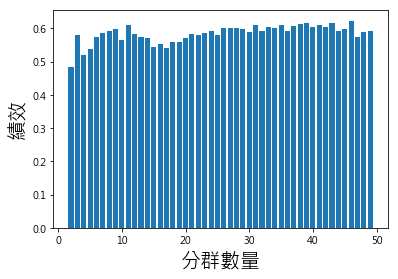

In [7]:
from sklearn import cluster, datasets, metrics
silhouette_avgs = []
#ks = range(2, s.shape[0])
ks = range(2, 50)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k,random_state=0).fit(s)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(s, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

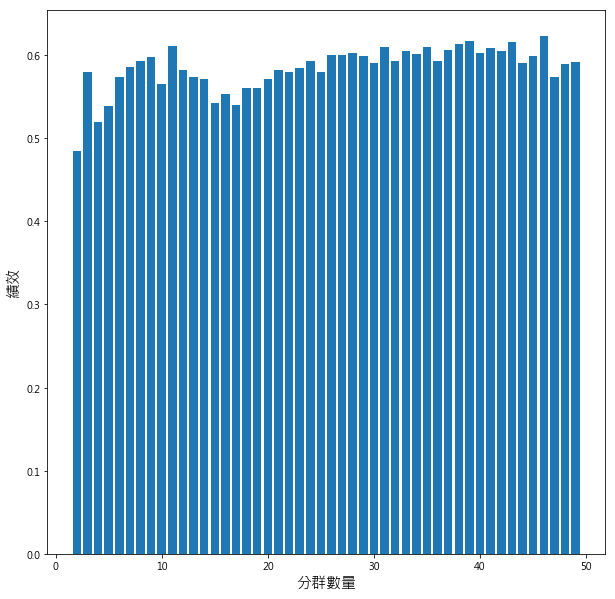

In [12]:
fig = plt.figure(figsize = (10,10))
plt.xlabel('分群數量',fontsize='15')
plt.ylabel('績效',fontsize='15')   
plt.bar(ks, silhouette_avgs)
plt.savefig('3.png', dpi=300)  
plt.show()

In [10]:
best_n_kemeans = silhouette_avgs.index(max(silhouette_avgs))
print( best_n_kemeans)

44


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
[[ 25.05158    121.54914333]
 [ 25.067      121.57746667]
 [ 25.04104884 121.56594419]
 [ 25.05285882 121.53055882]
 [ 25.05049811 121.55748491]
 [ 25.05817931 121.54401379]
 [ 25.04161842 121.55802895]
 [ 25.06265    121.5618    ]
 [ 25.07307059 121.57594706]
 [ 25.056925   121.591675  ]
 [ 25.05138182 121.54412121]
 [ 25.06142857 121.551     ]
 [ 25.048325   121.54675714]
 [ 25.068892   121.582956  ]
 [ 25.03704167 121.56930833]
 [ 25.06198333 121.53145556]
 [ 25.04771818 121.55331364]
 [ 25.045      121.5339    ]
 [ 25.04618333 121.56673333]
 [ 25.03902373 121.56894407]
 [ 25.04492222 121.55735   ]
 [ 25.0485875  121.5372375 ]
 [ 25.04819167 121.5496    ]
 [ 25.06073846 121.54390462]
 [ 25.0477125  121.54409583]
 [ 25.05154783 121.55392174]
 [ 25.05552174 121.54867391]
 [ 25.04116818 121.56134091]
 [ 25.07396087 121.57851739]
 [ 25.04779697 121.55766

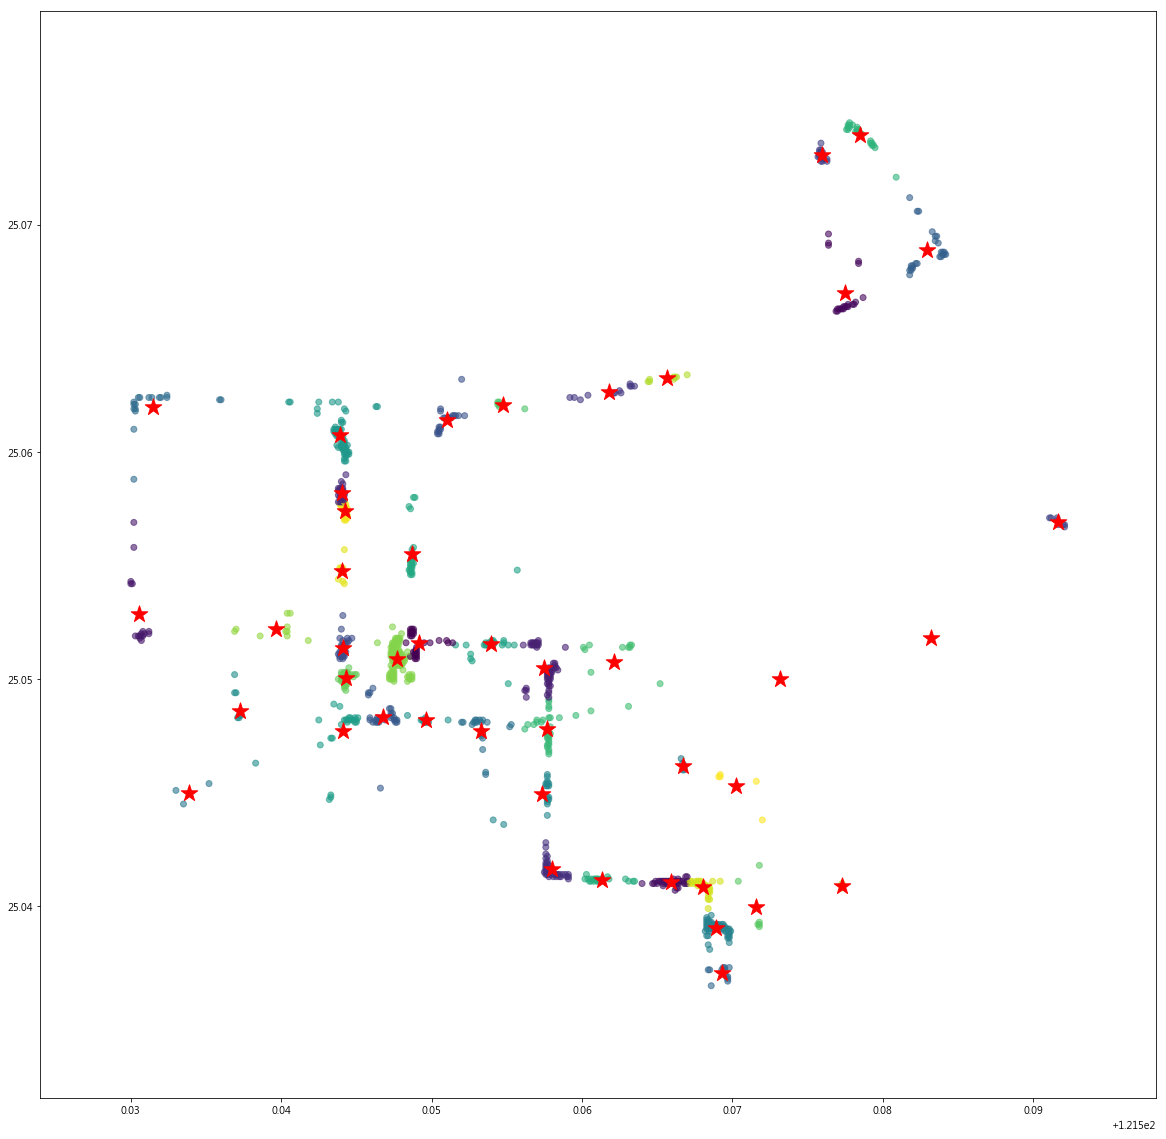

In [13]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=best_n_kemeans,random_state=0 )
clf.fit(s)
clf.labels_
fig = plt.figure(figsize = (20,20))
plt.scatter(s['經度'],s['緯度'], alpha=0.6,c=clf.labels_) 
print ( np.unique(clf.labels_)  )
centers = clf.cluster_centers_

for i in centers:
    plt.scatter(i[1],i[0], marker='*',c='r',s=300) 
plt.savefig('4.png', dpi=300)  
print (centers)

In [6]:
longitude =[]
latitude = []
for i in centers:
    latitude.append(i[0])
    longitude.append(i[1])

In [14]:
import random

#假設上午投遞成功和失敗信件數
morn_success = 1000
morn_fail = 600

#假設下午投遞成功和失敗信件數
after_success = 1000
after_fail = 600

capacity=100
total=['1' for i in range(morn_success) ]+['2' for i in range(morn_fail) ]+['3' for i in range(morn_success) ]+['4' for i in range(morn_fail) ]


#打散所有信件
random.shuffle(total)

customer=['a' for i in range(best_n_kemeans)]

#將每一筆信件隨機分給一個客戶
for i in total: 
    n=random.randint(0,best_n_kemeans-1)
    customer[n]+=i
    
morn=[]
after=[]

#計算每位客戶的上午投遞成功率和失敗率
for i in range(best_n_kemeans):
    morn.append(customer[i].count('1')/(customer[i].count('1')+customer[i].count('2') ))
    after.append(customer[i].count('3')/(customer[i].count('3')+customer[i].count('4') ))

print (morn,'\n')
print (after)
    



[0.6666666666666666, 0.6428571428571429, 0.5952380952380952, 0.5151515151515151, 0.6896551724137931, 0.7037037037037037, 0.6216216216216216, 0.6578947368421053, 0.5897435897435898, 0.46153846153846156, 0.5945945945945946, 0.7058823529411765, 0.5, 0.717948717948718, 0.6744186046511628, 0.6428571428571429, 0.5, 0.7222222222222222, 0.5853658536585366, 0.7317073170731707, 0.6944444444444444, 0.6538461538461539, 0.5833333333333334, 0.6046511627906976, 0.5806451612903226, 0.574468085106383, 0.53125, 0.5405405405405406, 0.6571428571428571, 0.6216216216216216, 0.6829268292682927, 0.6388888888888888, 0.5609756097560976, 0.5142857142857142, 0.5151515151515151, 0.7105263157894737, 0.7073170731707317, 0.5490196078431373, 0.6944444444444444, 0.6551724137931034, 0.625, 0.6842105263157895, 0.6666666666666666, 0.7058823529411765] 

[0.59375, 0.5, 0.6153846153846154, 0.7209302325581395, 0.5434782608695652, 0.5, 0.5714285714285714, 0.7631578947368421, 0.6875, 0.6410256410256411, 0.6363636363636364, 0.67

In [23]:
#https://www.wandouip.com/t5i7242/
# acc第一季的平均包裹重量，採取累積數量前80% 0~3500公克之間的重量資料，平均數:1265,標準差:855
# 所有重量的平均數:：3029   標準差:3694 中位數:1534
#average_weight = 1265
#sd_weight = 855

#mu, sigma =average_weight , sd_weight
#weight=[]
#while True:
#    if len(weight)== best_n_kemeans:
#        break        
#    y = np.random.normal(mu, sigma)
#    if y <= mu+sigma and y >= mu-sigma:
#        weight.append(y)

[ 5332.78177414   820.4419844   2571.96378447   345.81230716
 13653.87819615    94.03290734  5013.47834829  7771.63246846
   391.5629493   1083.52561805  3341.90935677  2568.46613481
  1985.54096993  3351.54304835  4965.84532155   967.95398231
  5271.57001671  2538.47198488  3434.20645832   930.82251505
  1599.70088009   161.96964902   609.76781102  3823.44762478
  1013.87362621  2698.58568782 13902.73125072  5258.76665518
   589.07526623  3511.70651967 12367.76783719   425.95761583
  7776.10428206   439.94213455  4152.35825205   227.36448953
  5567.55993152   440.97556504  3267.04489785  3615.60729073
  1087.79040504  4257.3710066   3044.8891836   5065.7988136 ]


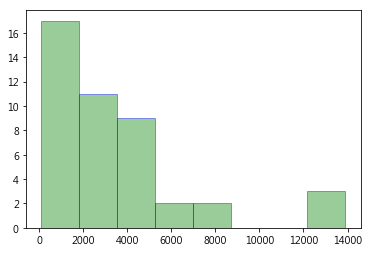

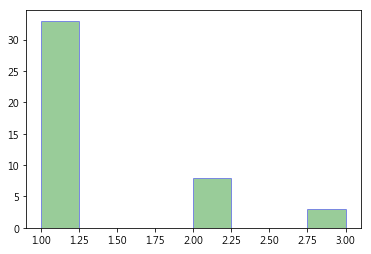

[2, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2]


In [22]:
#https://www.jianshu.com/p/c8b684d2d53d
weight = np.random.exponential(3029,best_n_kemeans)
print (weight)
plt.hist(weight,bins=8,color='g',edgecolor='b',alpha=0.4)
plt.show()


weight_unit=[] 

for i in weight:
    if i < 5000:
        weight_unit.append(1)
    elif i >=5000 and i < 10000:
        weight_unit.append(2)
    elif i >=10000 and i <15000:
        weight_unit.append(3)
    else:
        weight_unit.append(4)

plt.hist(weight_unit,bins=8,color='g',edgecolor='b',alpha=0.4)
plt.show()

print (weight_unit)


In [21]:
#weight = np.random.poisson(3029,best_n_kemeans)
#plt.hist(weight,bins=8,color='g',edgecolor='b',alpha=0.4)
#plt.show()
#print (weight)

In [17]:
import csv
with open('1001081_kmeans.csv', 'w', newline='') as csvfile:
    # 以空白分隔欄位，建立 CSV 檔寫入器
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['號碼', '緯度', '經度','上午投遞成功率','下午投遞成功率','重量','重量單位','郵局'])
    writer.writerow([0,25.05125,121.54823,"NaN","NaN","NaN","NaN",1])
    for i in range(0,best_n_kemeans):
        writer.writerow([i+1, latitude[i], longitude[i],morn[i],after[i],weight[i],weight_unit[i],0])

        
#臺北體育場郵局:南京東路3段346號後棟  25.051250, 121.548230        

In [10]:
#import random

#average_weight = 3029
#sd_weight = 3694

#mu, sigma =average_weight , sd_weight

#for i in range(50):   
#    y = random.lognormvariate(mu, sigma)
#    print (y)

OverflowError: math range error

In [9]:
print (random.lognormvariate(100, 5) )


2.5564536421729885e+43


In [10]:
random.normalvariate(3029, 3694)


7863.818024771451

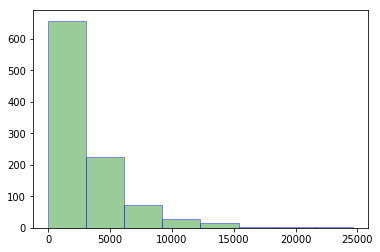

[2.71293107e+03 2.30154681e+03 1.92845426e+03 4.46071707e+03
 3.90708626e+03 7.62804658e+03 3.06880530e+03 7.97101713e+02
 1.07549635e+03 6.13171167e+03 1.51689604e+03 8.07352528e+02
 1.58526759e+03 1.51529247e+03 1.11275053e+03 2.54546594e+03
 3.23104804e+02 8.92173475e+02 1.42206378e+03 3.39248463e+03
 6.38220027e+03 1.26748330e+03 4.39093127e+03 1.90823935e+03
 5.70530426e+02 4.15229694e+03 4.17518926e+03 2.41478974e+02
 2.67535185e+03 1.24737745e+02 3.30416707e+02 3.30870069e+03
 3.33350932e+02 1.36128806e+03 1.19517031e+03 1.89531856e+03
 1.60131058e+03 4.64206455e+02 2.42726787e+03 2.39738271e+03
 9.93459400e+02 1.13023280e+04 3.68387600e+02 3.89826210e+03
 1.93986699e+03 7.42167404e+03 1.61372925e+04 1.22819066e+03
 3.53971216e+02 5.45862242e+03 3.71634467e+03 1.65234228e+03
 2.67968198e+03 6.62145530e+03 1.41732144e+03 3.17954159e+02
 4.32997427e+03 1.21981579e+03 2.75278104e+03 5.20295443e+02
 1.88027767e+03 5.58362074e+02 2.94779495e+03 1.44802568e+02
 8.39581599e+02 1.127917

In [44]:
list_e = np.random.exponential(3029,1000)
plt.hist(list_e,bins=8,color='g',edgecolor='b',alpha=0.4)
plt.show()
print (list_e)

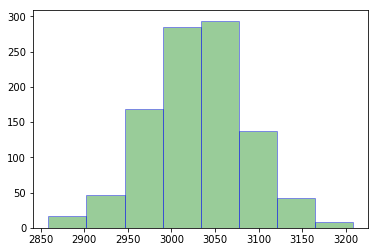

[3012 3067 3033 2953 2963 3036 3050 2989 3037 2993 3074 3172 3106 2941
 3030 3107 3005 3050 2991 3055 2978 3013 3024 2983 2989 2988 3099 3024
 3043 3140 3011 2974 3109 2979 3012 3041 3063 3000 3053 3121 2921 2963
 3002 2951 2953 2970 3091 3150 3028 3077 3002 2926 3074 3027 2982 3053
 2934 3115 2988 3052 2968 3095 3063 3049 2989 3081 3033 3079 3068 3009
 3112 3064 3017 3063 3057 3006 3056 2962 3033 3105 3084 2968 2958 3166
 2933 3053 3020 3004 2956 2987 3052 3046 2954 3052 3027 3036 3020 2937
 2912 3000 2889 3002 3113 3087 3037 3058 3034 3079 3038 2994 3021 3097
 2981 2941 3070 2969 3027 3040 3027 3068 2907 3044 3000 2976 2988 3040
 3035 3027 3058 3059 2959 3063 3017 3022 3039 3033 3011 2951 3004 3002
 3041 3021 3023 2990 3030 3101 2985 3036 2979 3016 3098 2997 3076 3000
 3143 3103 3083 3077 3013 2990 2948 3045 3047 3052 3053 2996 2975 3000
 3114 2994 2947 3032 3053 3073 3035 3079 3046 3001 3018 3108 3007 2971
 3037 3054 3115 3044 3065 3005 3041 3001 3058 3109 3143 2988 3019 3087
 3101 

In [47]:
list_e = np.random.poisson(3029,1000)
plt.hist(list_e,bins=8,color='g',edgecolor='b',alpha=0.4)
plt.show()
print (list_e)